Collection/summary/comparison of stereoseq data to date (1/17/2023)

In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd

# modify path so we can import a custom module
import sys
sys.path.append('.')

from sawg import SpotTable

In [3]:
data_path = '//allen/programs/celltypes/workgroups/rnaseqanalysis/NHP_spatial'

## Macaque

In [4]:
nhp1_file = data_path + '/BGI/cDNAD5/macaque-cDNA5.gem'
nhp2_file = data_path + '/BGI/cDNAC4/C4_tissue.gem'

In [5]:
nhp1_table = SpotTable.load_stereoseq(nhp1_file, nhp1_file + '.npz')
nhp2_table = SpotTable.load_stereoseq(nhp2_file, nhp2_file + '.npz', skiprows=7)

Loading from npz..
Loading from npz..


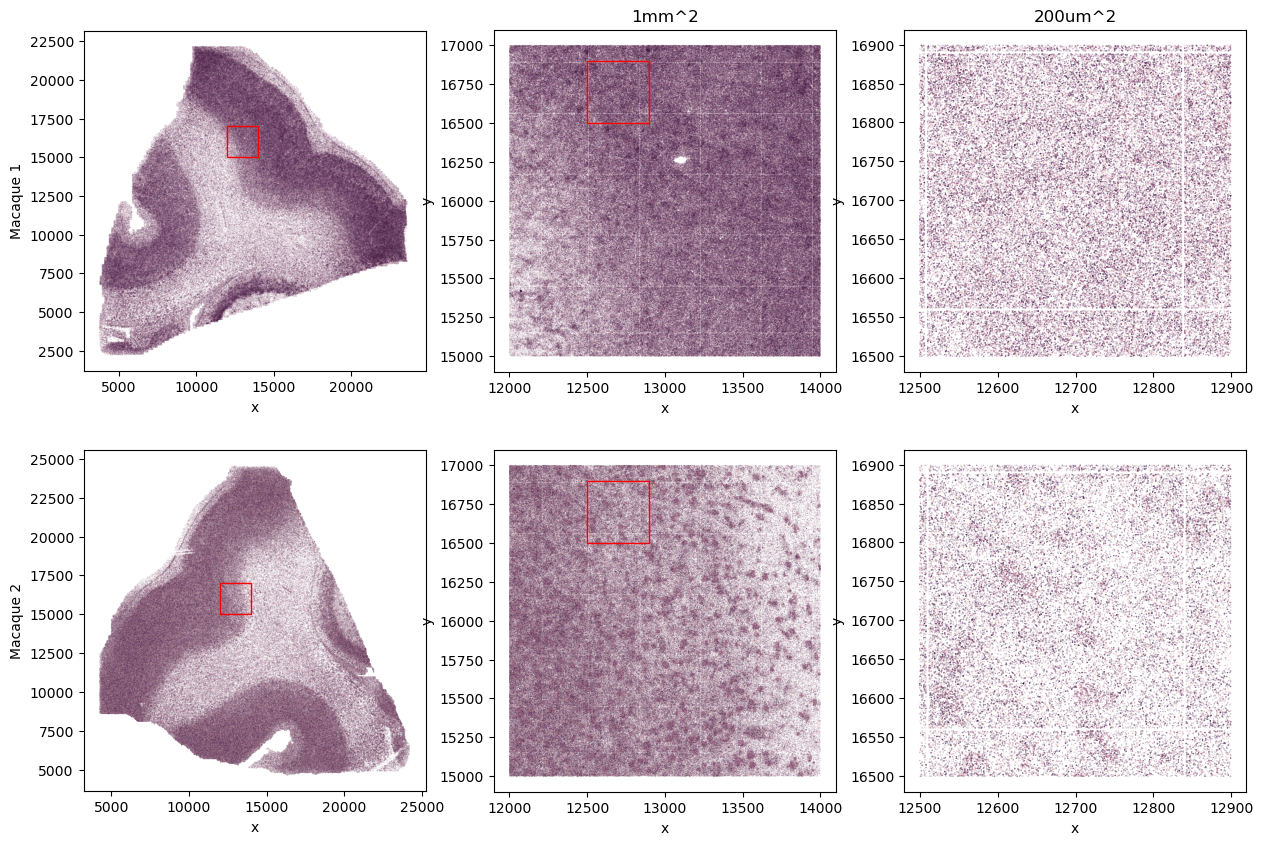

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

for i, table in enumerate([nhp1_table, nhp2_table]):
    table[::100].scatter_plot(ax=ax[i, 0], alpha=0.1, size=0.5)
    sub = table.get_subregion(xlim=(12000, 14000), ylim=(15000, 17000))
    sub.plot_rect(ax[i, 0], 'r')
    sub.scatter_plot(ax=ax[i, 1], alpha=0.1, size=0.5)
    sub2 = sub.get_subregion(xlim=(12500, 12900), ylim=(16500, 16900))
    sub2.plot_rect(ax[i, 1], 'r')
    sub2.scatter_plot(ax=ax[i, 2], alpha=0.3, size=1)
    
    if i==0:
        ax[i, 1].set_title('1mm^2')
        ax[i, 2].set_title('200um^2')
        ax[i, 0].set_ylabel('Macaque 1')
    if i==1:
#         [axi.invert_xaxis() for axi in ax[i]]
#         [axi.invert_yaxis() for axi in ax[i]]
        ax[i, 0].set_ylabel('Macaque 2')

In [6]:
ex_genes = ['CUX2', 'RORB', 'IL1RAPL2', 'NTNG2', 'FOXP2']
in_genes = ['VIP', 'PVALB', 'GRIK1', 'LAMP5']
nn_genes = ['GFAP', 'OPALIN', 'PDGFRA', 'MOG']

Text(0, 0.5, 'Macaque 2')

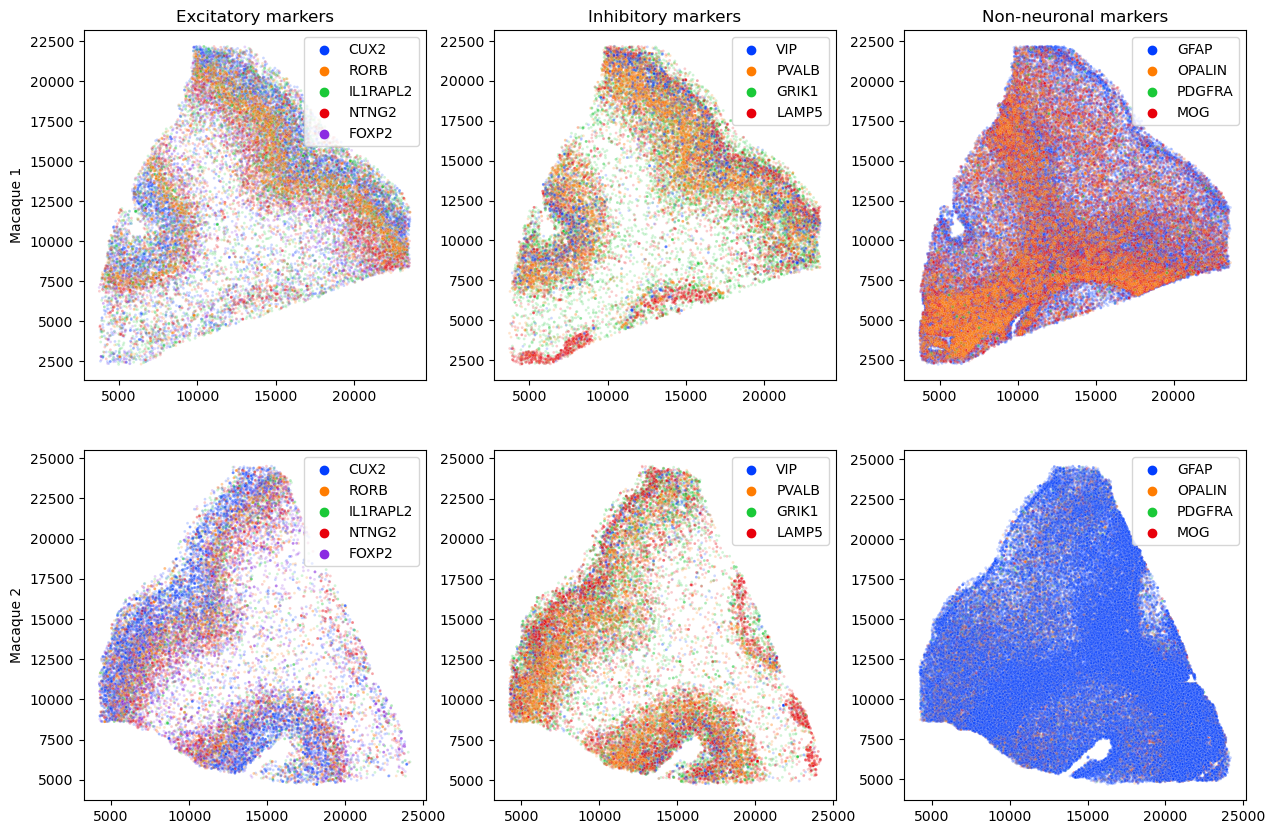

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

for i, table in enumerate([nhp1_table, nhp2_table]):
    for j, gene_list in enumerate([ex_genes, in_genes, nn_genes]):
        gene_table = table.get_genes(gene_list)
        sns.scatterplot(x=gene_table.x, y=gene_table.y, hue=gene_table.gene_names, palette='bright', hue_order=gene_list, 
                        alpha=0.2, s=4, ax=ax[i, j])
        
ax[0, 0].set_title('Excitatory markers')
ax[0, 1].set_title('Inhibitory markers')
ax[0, 2].set_title('Non-neuronal markers')
ax[0, 0].set_ylabel('Macaque 1')
ax[1, 0].set_ylabel('Macaque 2')

Text(0, 0.5, 'Macaque 2')

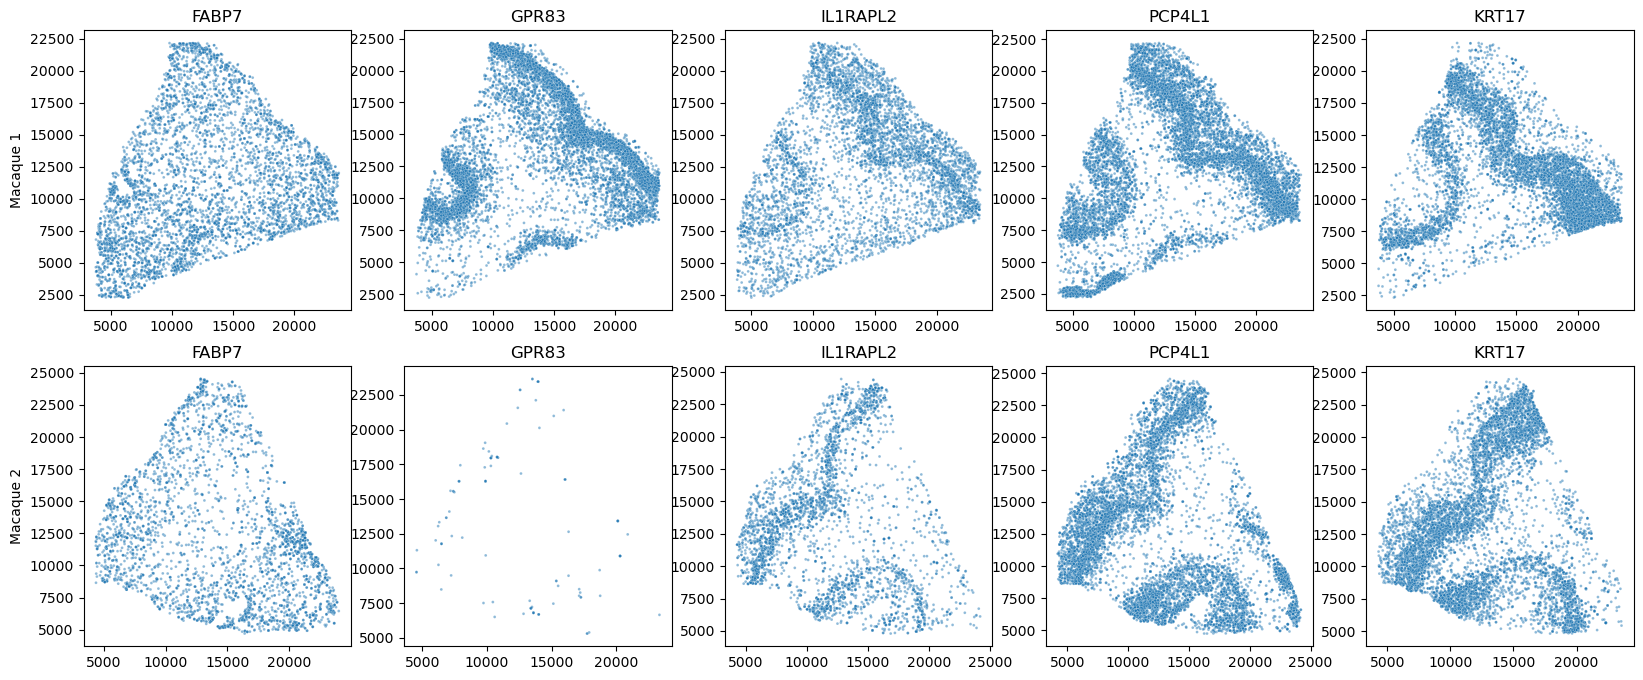

In [8]:
fig, ax = plt.subplots(2, 5, figsize=(20, 8))

plot_genes = ['FABP7', 'GPR83', 'IL1RAPL2', 'PCP4L1', 'KRT17']

for i, table in enumerate([nhp1_table, nhp2_table]):
    for j, gene in enumerate(plot_genes):
        gene_table = table.get_genes([gene])
        sns.scatterplot(x=gene_table.x, y=gene_table.y, hue=gene_table.gene_names, alpha=0.5, s=4, ax=ax[i, j], legend=False)
        ax[i, j].set_title(gene)
ax[0, 0].set_ylabel('Macaque 1')
ax[1, 0].set_ylabel('Macaque 2')

How does gene expression compare

In [6]:
nhp1_genes, nhp1_counts = np.unique(nhp1_table.gene_names, return_counts=True)
nhp2_genes, nhp2_counts = np.unique(nhp2_table.gene_names, return_counts=True)

print(f'Macaque 1 total genes: {len(nhp1_genes)}')
print(f'Macaque 2 total genes: {len(nhp2_genes)}')

Macaque 1 total genes: 16036
Macaque 2 total genes: 29692


In [45]:
gene_counts = pd.DataFrame(data=nhp1_counts, index=nhp1_genes, columns=['Macaque 1'])
gene_counts = gene_counts.merge(pd.DataFrame(data=nhp2_counts, index=nhp2_genes, columns=['Macaque 2']), left_index=True, 
                               right_index=True, how='outer')
for col in gene_counts.columns:
    gene_counts[col + ' log'] = np.log(gene_counts[col])
gene_counts.head()

Macaque 1  Macaque 2  Macaque 1 log  Macaque 2 log
A1BG           NaN      440.0            NaN       6.086775
A1CF           NaN       23.0            NaN       3.135494
A2M        13118.0        NaN       9.481741            NaN
A2ML1        987.0      545.0       6.894670       6.300786
A3GALT2       50.0       29.0       3.912023       3.367296

In [8]:
# Correlation of genes that overlap
gene_counts.corr()

Macaque 1  Macaque 2  Macaque 1 log  Macaque 2 log
Macaque 1       1.000000   0.671993       0.377938       0.332058
Macaque 2       0.671993   1.000000       0.431413       0.124995
Macaque 1 log   0.377938   0.431413       1.000000       0.845756
Macaque 2 log   0.332058   0.124995       0.845756       1.000000

In [9]:
gene_counts = gene_counts.fillna(0)
# Correlation of all genes
gene_counts.corr()

Macaque 1  Macaque 2  Macaque 1 log  Macaque 2 log
Macaque 1       1.000000   0.122416       0.342710       0.256898
Macaque 2       0.122416   1.000000       0.062972       0.121901
Macaque 1 log   0.342710   0.062972       1.000000       0.621305
Macaque 2 log   0.256898   0.121901       0.621305       1.000000

In [ ]:
# for comparison, 2 adjacent MERSCOPE sections from Macaque MTG have a correlation = 0.987

In [13]:
gene_counts[gene_counts.index.isin(ex_genes+in_genes+nn_genes)].sort_values('Macaque 1')

Macaque 1  Macaque 2
PDGFRA        545.0     3663.0
VIP          2657.0     3539.0
FOXP2        3893.0     5769.0
NTNG2        4414.0     3627.0
RORB         5241.0     4239.0
IL1RAPL2     5771.0     3763.0
PVALB        7908.0     7596.0
LAMP5        8597.0    10276.0
CUX2         9154.0     8139.0
GRIK1       11928.0    10021.0
OPALIN      14481.0    13622.0
MOG         28461.0    17184.0
GFAP        86939.0   121108.0

Text(0.5, 1.0, 'Total Gene Counts')

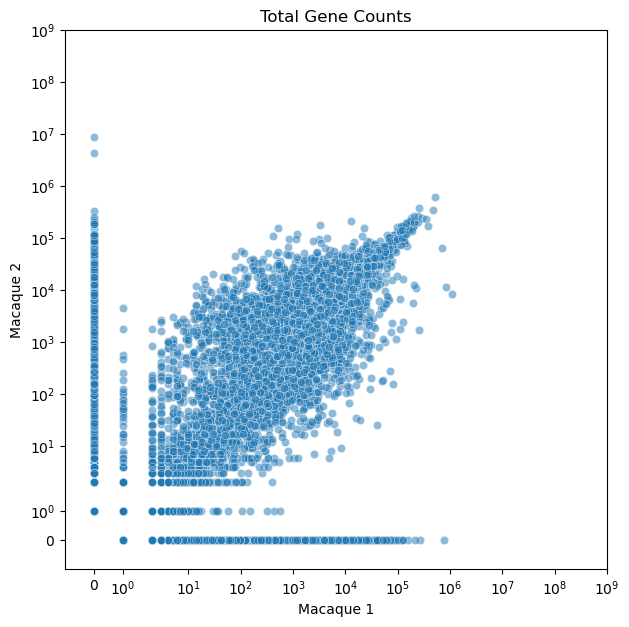

In [14]:
fig, ax = plt.subplots(figsize=(7,7))

sns.scatterplot(data=gene_counts, x='Macaque 1', y='Macaque 2', alpha=0.5, lw=0, ax=ax)
ax.set_xscale('symlog')
ax.set_yscale('symlog')
ax.set_xlim(-1, 10e8)
ax.set_ylim(-1, 10e8)
ax.set_title('Total Gene Counts')

In [15]:
nhp1_only_genes = gene_counts[(gene_counts['Macaque 1']>0) & (gene_counts['Macaque 2']==0)].sort_values('Macaque 1', ascending=False).index.to_list()
print(f'Number of genes only captured in Macaque 1: {len(nhp1_only_genes)}')
nhp2_only_genes = gene_counts[(gene_counts['Macaque 2']>0) & (gene_counts['Macaque 1']==0)].sort_values('Macaque 2', ascending=False).index.to_list()
print(f'Number of genes only captured in Macaque 2: {len(nhp2_only_genes)}')

top_10 = gene_counts[gene_counts.index.isin(nhp1_only_genes[:10]+nhp2_only_genes[:10])].sort_values(['Macaque 1', 'Macaque 2'])
top_10

Number of genes only captured in Macaque 1: 1297
Number of genes only captured in Macaque 2: 14953


Macaque 1  Macaque 2
ALDOA               0.0   147470.0
MT3                 0.0   187372.0
HSP90AB1            0.0   187519.0
UBC                 0.0   188507.0
TUBA1A              0.0   205460.0
LOC722929           0.0   221142.0
TMSB4X              0.0   259459.0
CALM1               0.0   336476.0
LOC114674534        0.0  4243041.0
LOC109910387        0.0  8983712.0
ND1             85264.0        0.0
GNAS            93196.0        0.0
NME1-NME2      101001.0        0.0
ATP5I          114399.0        0.0
C15orf41       119519.0        0.0
SEPT5          126028.0        0.0
COX2           158611.0        0.0
MT2            213566.0        0.0
Hsp90ab1       270389.0        0.0
CYTB           779346.0        0.0

Look at differentially expressed genes between the 2 samples as well as some that are similar

In [16]:
nhp1_high = gene_counts[(gene_counts['Macaque 1']>=1e3) & (gene_counts['Macaque 2'].between(10, 100))].sort_values('Macaque 1', ascending=False)
nhp1_high

Macaque 1  Macaque 2
RPL18A      39445.0       26.0
TMEM25      18580.0       32.0
RAD21L1     15874.0       35.0
B4GALNT4    11918.0       66.0
PYURF        6924.0       19.0
...             ...        ...
CNR1         1166.0       85.0
CPT2         1109.0       98.0
LYZ          1091.0       17.0
CCDC172      1054.0       53.0
BVES         1048.0       91.0

[61 rows x 2 columns]

In [17]:
nhp2_high = gene_counts[(gene_counts['Macaque 2']>=1e3) & (gene_counts['Macaque 1'].between(10, 100))].sort_values('Macaque 2', ascending=False)
nhp2_high

Macaque 1  Macaque 2
BLCAP         99.0    55685.0
CDK5R2        76.0    45524.0
JUND          97.0    27642.0
SHISA4        78.0    23924.0
KBTBD11       30.0    20680.0
...            ...        ...
MARS2         24.0     1036.0
PKDCC         65.0     1018.0
ZFP3          85.0     1012.0
MYCN          17.0     1003.0
BATF2         86.0     1000.0

[197 rows x 2 columns]

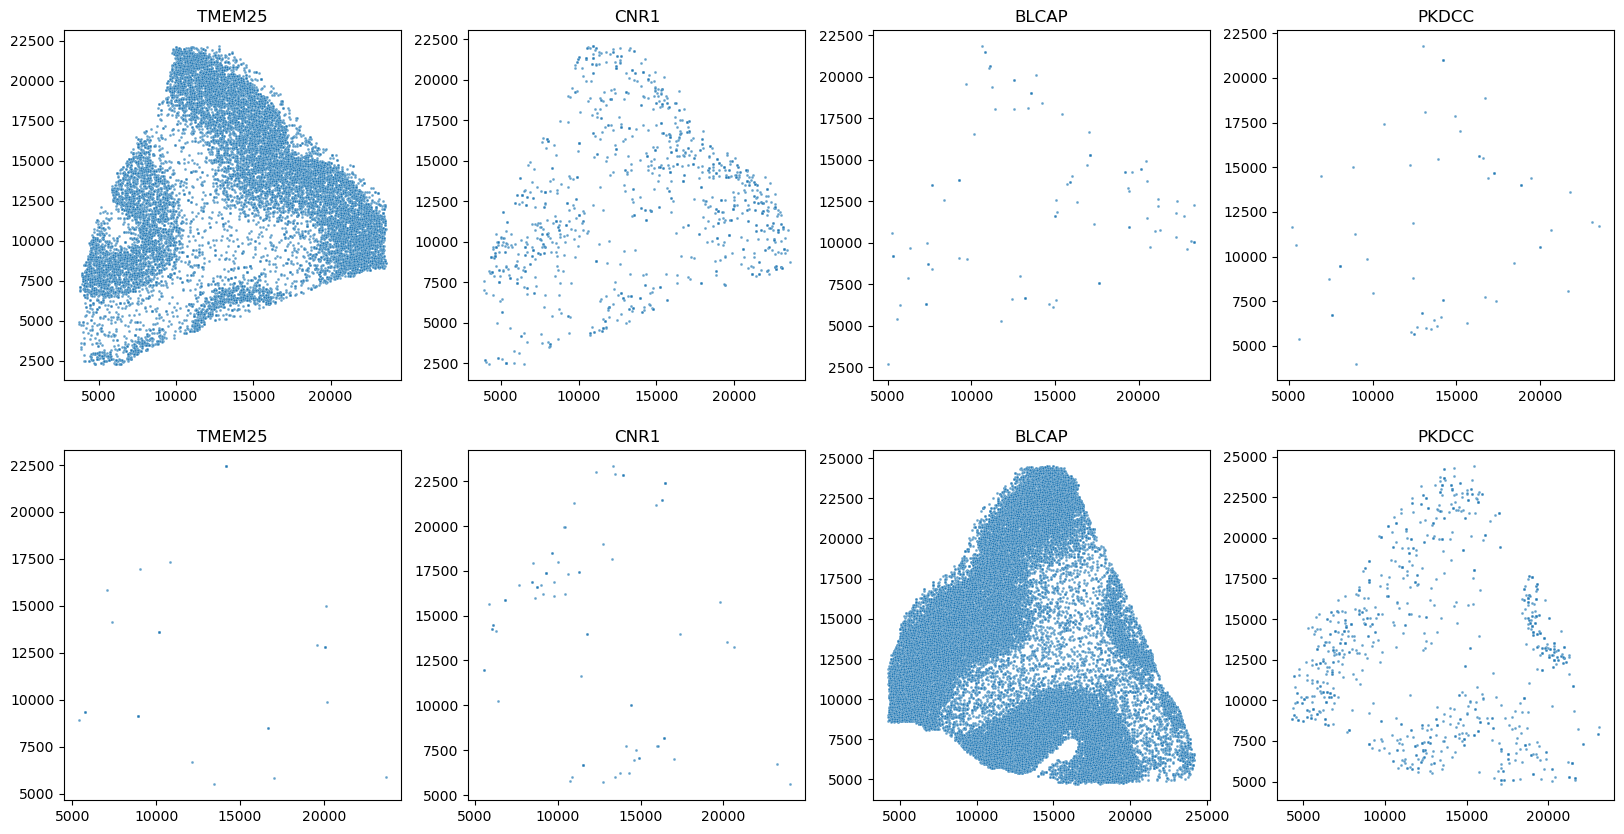

In [18]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

plot_genes = ['TMEM25', 'CNR1', 'BLCAP', 'PKDCC']

for i, table in enumerate([nhp1_table, nhp2_table]):
    for j, gene in enumerate(plot_genes):
        gene_table = table.get_genes([gene])
        sns.scatterplot(x=gene_table.x, y=gene_table.y, alpha=0.7, s=4, ax=ax[i, j], legend=False)
        ax[i, j].set_title(gene)

Gene capture vs bin size

In [106]:
bins = [
    {'bin size': 20, 'median genes': 141, 'median MIDs': 211, 'dataset': 'Macaque 1'},
    {'bin size': 50, 'median genes': 784, 'median MIDs': 1325, 'dataset': 'Macaque 1'},
    {'bin size': 100,  'median genes': 2439, 'median MIDs': 5191, 'dataset': 'Macaque 1'},
    {'bin size': 150, 'median genes': 4385, 'median MIDs': 11757, 'dataset': 'Macaque 1'},
    {'bin size': 200, 'median genes': 6067, 'median MIDs': 19912, 'dataset': 'Macaque 1'}, 
    {'bin size': 20, 'median genes': 108, 'median MIDs': 175, 'dataset': 'Macaque 2'},
    {'bin size': 50, 'median genes': 600, 'median MIDs': 1085, 'dataset': 'Macaque 2'},
    {'bin size': 100, 'median genes': 1908, 'median MIDs': 4225, 'dataset': 'Macaque 2'},
    {'bin size': 150, 'median genes': 3381, 'median MIDs': 9229, 'dataset': 'Macaque 2'},
    {'bin size': 200, 'median genes': 4871, 'median MIDs': 20297, 'dataset': 'Macaque 2'},
]

bins_df = pd.DataFrame(bins)
bins_df

bin size  median genes  median MIDs    dataset
0        20           141          211  Macaque 1
1        50           784         1325  Macaque 1
2       100          2439         5191  Macaque 1
3       150          4385        11757  Macaque 1
4       200          6067        19912  Macaque 1
5        20           108          175  Macaque 2
6        50           600         1085  Macaque 2
7       100          1908         4225  Macaque 2
8       150          3381         9229  Macaque 2
9       200          4871        20297  Macaque 2

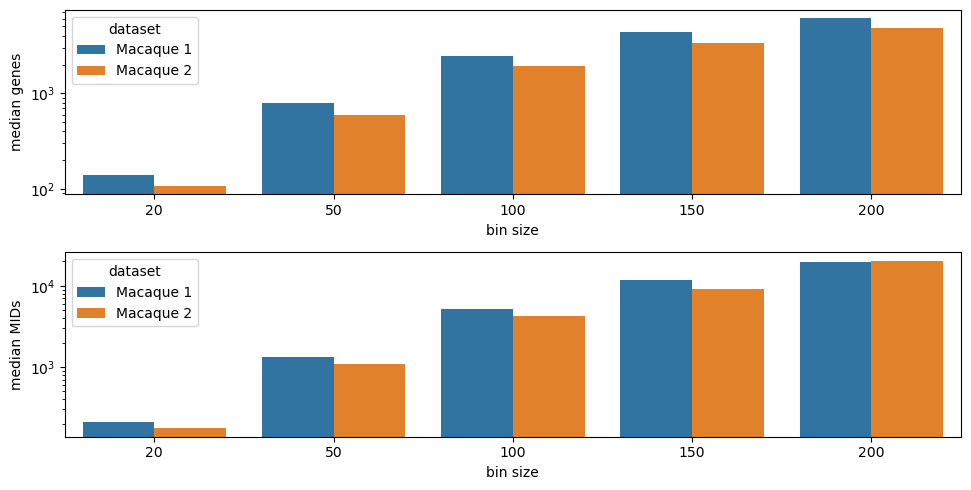

In [108]:
fig, ax = plt.subplots(2, 1, figsize=(10, 5))

sns.barplot(data=bins_df, x='bin size', y='median genes', hue='dataset', ax=ax[0])
sns.barplot(data=bins_df, x='bin size', y='median MIDs', hue='dataset', ax=ax[1])
plt.tight_layout()
ax[0].set_yscale('log')
ax[1].set_yscale('log')

Sensitivity compared to Bulk-seq and MERSCOPE

In [10]:
bulk_file  = data_path + '/bulkseq/macaque/QM22.26.030.MTG_abundance.tab'

In [11]:
mtg_bulk = pd.read_csv(bulk_file, sep='\t')
mtg_bulk.set_index('Gene Name', inplace=True)
mtg_bulk.head()

Gene ID Reference Strand   Start     End  Coverage  \
Gene Name                                                                  
ZNF692     ENSMMUG00000000634         1      +   71582   83178  8.521720   
ZNF672     ENSMMUG00000037875         1      -   81258   91679  9.165439   
Y_RNA      ENSMMUG00000062908         1      -  890811  890912  1.877451   
OR2L2      ENSMMUG00000057748         1      -  895998  896936  0.540735   
Y_RNA      ENSMMUG00000051218         1      -  904003  904104  1.230392   

               FPKM        TPM  
Gene Name                       
ZNF692     3.596079  10.955501  
ZNF672     4.457458  13.579706  
Y_RNA      0.752815   2.293462  
OR2L2      0.216823   0.660553  
Y_RNA      0.493359   1.503026

In [47]:
gene_counts = gene_counts.merge(mtg_bulk['FPKM'], left_index=True, right_index=True, how='outer')
gene_counts.fillna(0, inplace=True)
gene_counts.head()

Macaque 1  Macaque 2  Macaque 1 log  Macaque 2 log  FPKM
5S_rRNA        0.0        0.0            0.0            0.0   0.0
5S_rRNA        0.0        0.0            0.0            0.0   0.0
5S_rRNA        0.0        0.0            0.0            0.0   0.0
5S_rRNA        0.0        0.0            0.0            0.0   0.0
5S_rRNA        0.0        0.0            0.0            0.0   0.0

In [48]:
drop_outs = gene_counts[(gene_counts['Macaque 1']==0) | (gene_counts['Macaque 2']==0)]
drop_outs = drop_outs[drop_outs['FPKM']>0]
drop_outs.head()

Macaque 1  Macaque 2  Macaque 1 log  Macaque 2 log      FPKM
5S_rRNA        0.0        0.0            0.0            0.0  0.110361
5S_rRNA        0.0        0.0            0.0            0.0  0.132526
5S_rRNA        0.0        0.0            0.0            0.0  0.118934
5S_rRNA        0.0        0.0            0.0            0.0  0.029989
5S_rRNA        0.0        0.0            0.0            0.0  0.029739

In [50]:
len(drop_outs.index.unique())

1914

In [49]:
drop_outs.describe()

Macaque 1      Macaque 2  Macaque 1 log  Macaque 2 log         FPKM
count    3205.000000    3205.000000    3205.000000    3205.000000  3205.000000
mean      683.127301    3468.987832       0.601664       3.152941    19.641406
std     14523.700162   12754.633510       1.962848       3.949135   185.435190
min         0.000000       0.000000       0.000000       0.000000     0.000001
25%         0.000000       0.000000       0.000000       0.000000     0.218689
50%         0.000000       0.000000       0.000000       0.000000     1.166905
75%         0.000000    1678.000000       0.000000       7.425358     8.729852
max    779346.000000  259459.000000      13.566210      12.466354  6633.658691

In [51]:
gene_counts = gene_counts[gene_counts['FPKM']>0]
gene_counts = gene_counts.drop_duplicates()
gene_counts.head()

Macaque 1  Macaque 2  Macaque 1 log  Macaque 2 log      FPKM
5S_rRNA        0.0        0.0            0.0            0.0  0.110361
5S_rRNA        0.0        0.0            0.0            0.0  0.132526
5S_rRNA        0.0        0.0            0.0            0.0  0.118934
5S_rRNA        0.0        0.0            0.0            0.0  0.029989
5S_rRNA        0.0        0.0            0.0            0.0  0.029739

[None, None]

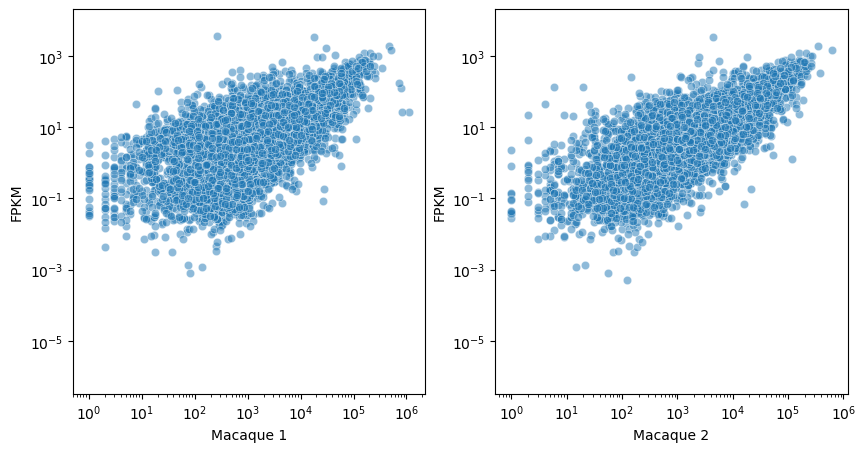

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(data=gene_counts, x='Macaque 1', y='FPKM', alpha=0.5, lw=0, ax=ax[0])
sns.scatterplot(data=gene_counts, x='Macaque 2', y='FPKM', alpha=0.5, lw=0, ax=ax[1])
[a.set_yscale('log') for a in ax]
[a.set_xscale('log') for a in ax]

In [53]:
gene_counts['FPKM log'] = np.log(gene_counts['FPKM'])
gene_counts.corr()

Macaque 1  Macaque 2  Macaque 1 log  Macaque 2 log      FPKM  \
Macaque 1       1.000000   0.579405       0.318530       0.243619  0.271942   
Macaque 2       0.579405   1.000000       0.267415       0.424695  0.388381   
Macaque 1 log   0.318530   0.267415       1.000000       0.654926  0.100827   
Macaque 2 log   0.243619   0.424695       0.654926       1.000000  0.124384   
FPKM            0.271942   0.388381       0.100827       0.124384  1.000000   
FPKM log        0.301604   0.453464       0.509134       0.687900  0.311245   

               FPKM log  
Macaque 1      0.301604  
Macaque 2      0.453464  
Macaque 1 log  0.509134  
Macaque 2 log  0.687900  
FPKM           0.311245  
FPKM log       1.000000

MERSCOPE

In [23]:
merscope1_path = data_path + '/MERSCOPE/macaque/1191380959/region_0/mtg/'

merscope2_path = data_path + '/MERSCOPE/macaque/1191380984/region_0/mtg/'

In [24]:
merscope1_table = SpotTable.load_merscope(merscope1_path + 'detected_transcripts.csv', merscope1_path + 'detected_transcripts.npz')
merscope2_table = SpotTable.load_merscope(merscope2_path + 'detected_transcripts.csv', merscope2_path + 'detected_transcripts.npz')

Loading from npz..
Loading from npz..


In [25]:
merscope1_region = merscope1_table.get_subregion(xlim=(3700, 5000), ylim=(4800, 6400))
merscope2_region = merscope2_table.get_subregion(xlim=(3500, 4800), ylim=(5200, 6800))

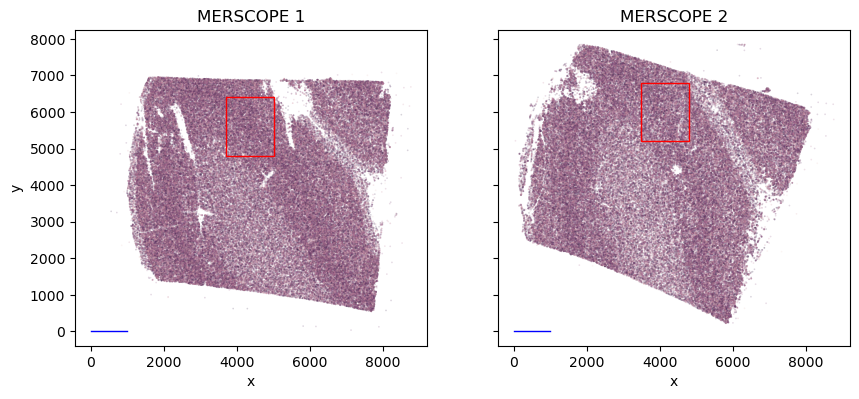

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

merscope1_table[::500].scatter_plot(ax[0])
merscope1_region.plot_rect(ax[0], 'r')
ax[0].set_title('MERSCOPE 1')
ax[1].set_title('MERSCOPE 2')
merscope2_table[::500].scatter_plot(ax[1])
merscope2_region.plot_rect(ax[1], 'r')

merscope_mm = (0, 1000)
_ = ax[0].plot(merscope_mm, (0, 0), c='b', lw=1)
_ = ax[1].plot(merscope_mm, (0, 0), c='b', lw=1)

In [27]:
stereoseq1_region = nhp1_table.get_subregion(xlim=(11000, 13601), ylim=(17500, 20701))
stereoseq2_region = nhp2_table.get_subregion(xlim=(5500, 8701), ylim=(10000, 12601))

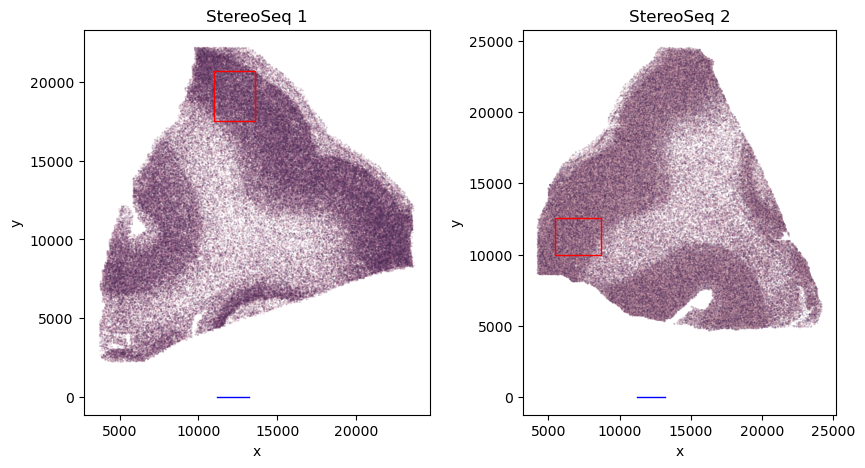

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=False, sharey=False)

nhp1_table[::500].scatter_plot(ax[0])
stereoseq1_region.plot_rect(ax[0], 'r')
ax[0].set_title('StereoSeq 1')
ax[1].set_title('StereoSeq 2')
nhp2_table[::500].scatter_plot(ax[1])
stereoseq2_region.plot_rect(ax[1], 'r')

stereoseq_mm = (11200, 13201)
_ = ax[0].plot(stereoseq_mm, (0, 0), c='b', lw=1)
_ = ax[1].plot(stereoseq_mm, (0, 0), c='b', lw=1)

Text(0.5, 1.0, 'StereoSeq 2')

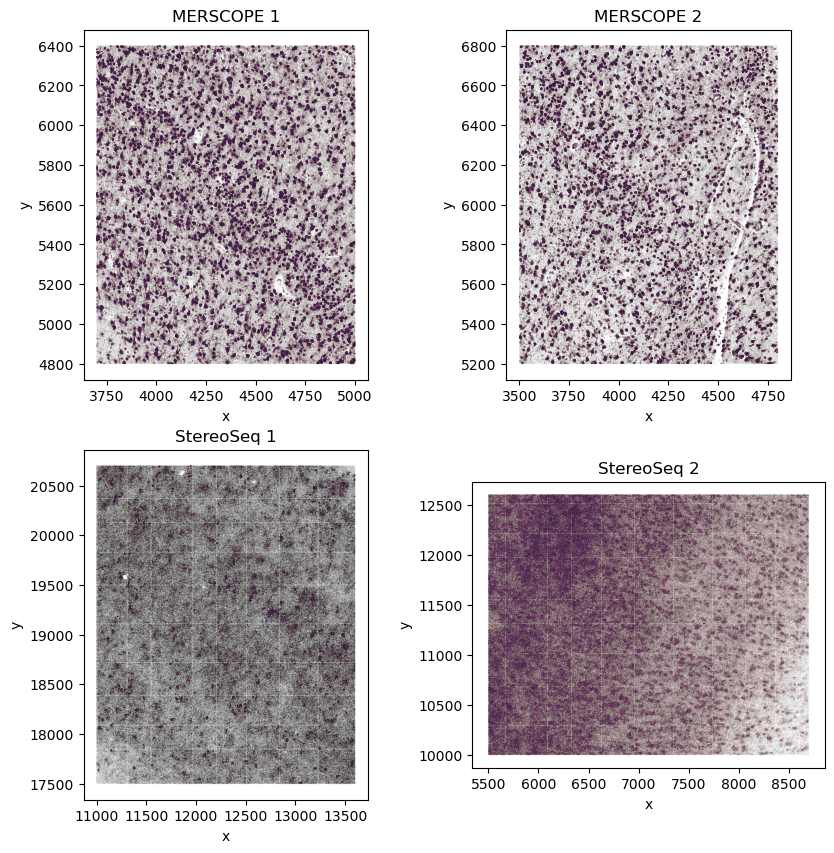

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
merscope1_region.scatter_plot(ax=ax[0, 0], alpha=0.005)
ax[0, 0].set_title('MERSCOPE 1')
merscope2_region.scatter_plot(ax=ax[0, 1], alpha=0.005)
ax[0, 1].set_title('MERSCOPE 2')
stereoseq1_region.scatter_plot(ax=ax[1, 0], alpha=0.005)
ax[1, 0].set_title('StereoSeq 1')
stereoseq2_region.scatter_plot(ax=ax[1, 1], alpha=0.005)
ax[1, 1].set_title('StereoSeq 2')

In [28]:
merscope1_genes, merscope1_counts = np.unique(merscope1_table.gene_names, return_counts=True)
merscope2_genes, merscope2_counts = np.unique(merscope2_table.gene_names, return_counts=True)

In [54]:
merscope_counts = pd.DataFrame(data=merscope1_counts, index=merscope1_genes, columns=['MERSCOPE 1'])
merscope_counts = merscope_counts.merge(pd.DataFrame(data=merscope2_counts, index=merscope2_genes, columns=['MERSCOPE 2']),
                                        left_index=True, right_index=True)
blanks = [b for b in merscope1_genes if b.startswith('Blank')]
merscope_blanks = merscope_counts.loc[blanks]
merscope_counts.drop(blanks, inplace=True)
merscope_counts = merscope_counts.merge(gene_counts, left_index=True, right_index=True, how='inner').rename(
    columns={'Macaque 1': 'Stereoseq 1', 'Macaque 2': 'Stereoseq 2'})
for col in merscope_counts.columns:
    if 'log' in col:
        continue
    merscope_counts[col + ' log'] = np.log(merscope_counts[col])
print(len(merscope_counts))
merscope_counts.head()

476


C:\Users\stephanies\AppData\Local\Continuum\miniconda3\envs\stereoseq\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\stephanies\AppData\Local\Continuum\miniconda3\envs\stereoseq\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


MERSCOPE 1  MERSCOPE 2  Stereoseq 1  Stereoseq 2  Macaque 1 log  \
ABCC5         238439      188030      13739.0      12917.0       9.527994   
ABLIM2        455705      454729       5998.0      13724.0       8.699181   
ABR          1358054     1238088       7569.0      45154.0       8.931816   
ADAMTS3        50850       37063       2498.0       2166.0       7.823246   
ADAMTSL3       65210       54833          0.0       1911.0       0.000000   

          Macaque 2 log        FPKM  FPKM log  MERSCOPE 1 log  MERSCOPE 2 log  \
ABCC5          9.466300   17.090000  2.838493       12.381869       12.144357   
ABLIM2         9.526901   29.471939  3.383439       13.029601       13.027457   
ABR           10.717834  162.878998  5.093008       14.121563       14.029079   
ADAMTS3        7.680637    4.139911  1.420674       10.836635       10.520374   
ADAMTSL3       7.555382    2.756769  1.014059       11.085368       10.912047   

          Stereoseq 1 log  Stereoseq 2 log  
ABCC5            9.527994         9.466300  
ABLIM2           8.699181         9.526901  
ABR              8.931816        10.717834  
ADAMTS3          7.823246         7.680637  
ADAMTSL3             -inf         7.555382

In [59]:
merscope_blanks['Avg'] = merscope_blanks.apply(lambda x: x.mean(), axis=1)
merscope_blanks.head()

MERSCOPE 1  MERSCOPE 2     Avg
Blank-0         6552        4460  5506.0
Blank-1         6839        5161  6000.0
Blank-10        8958        9683  9320.5
Blank-11        9308        6242  7775.0
Blank-12        4341        3180  3760.5

<AxesSubplot:>

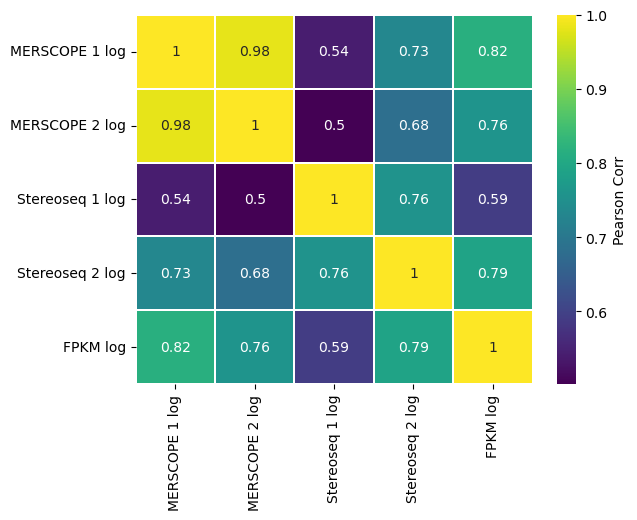

In [55]:
sns.heatmap(merscope_counts[['MERSCOPE 1 log', 'MERSCOPE 2 log', 'Stereoseq 1 log', 'Stereoseq 2 log', 'FPKM log']].corr(), cmap ='viridis', linewidths = 0.30, annot = True, cbar_kws={'label': 'Pearson Corr'})

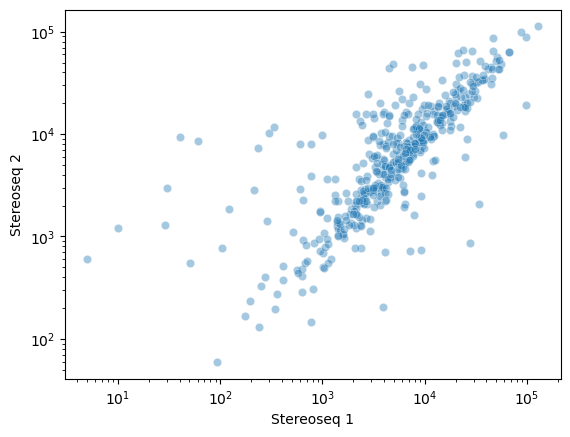

In [42]:
ax = sns.scatterplot(data=merscope_counts, x='Stereoseq 1', y='Stereoseq 2', alpha=0.4, lw=0)
ax.set_yscale('log')
ax.set_xscale('log')

In [57]:
merscope_counts['Avg MERSCOPE'] = merscope_counts.apply(lambda x: x[['MERSCOPE 1', 'MERSCOPE 2']].mean(), axis=1)
merscope_counts.head()

MERSCOPE 1  MERSCOPE 2  Stereoseq 1  Stereoseq 2  Macaque 1 log  \
ABCC5         238439      188030      13739.0      12917.0       9.527994   
ABLIM2        455705      454729       5998.0      13724.0       8.699181   
ABR          1358054     1238088       7569.0      45154.0       8.931816   
ADAMTS3        50850       37063       2498.0       2166.0       7.823246   
ADAMTSL3       65210       54833          0.0       1911.0       0.000000   

          Macaque 2 log        FPKM  FPKM log  MERSCOPE 1 log  MERSCOPE 2 log  \
ABCC5          9.466300   17.090000  2.838493       12.381869       12.144357   
ABLIM2         9.526901   29.471939  3.383439       13.029601       13.027457   
ABR           10.717834  162.878998  5.093008       14.121563       14.029079   
ADAMTS3        7.680637    4.139911  1.420674       10.836635       10.520374   
ADAMTSL3       7.555382    2.756769  1.014059       11.085368       10.912047   

          Stereoseq 1 log  Stereoseq 2 log  Avg MERSCOPE  
ABCC5            9.527994         9.466300      213234.5  
ABLIM2           8.699181         9.526901      455217.0  
ABR              8.931816        10.717834     1298071.0  
ADAMTS3          7.823246         7.680637       43956.5  
ADAMTSL3             -inf         7.555382       60021.5

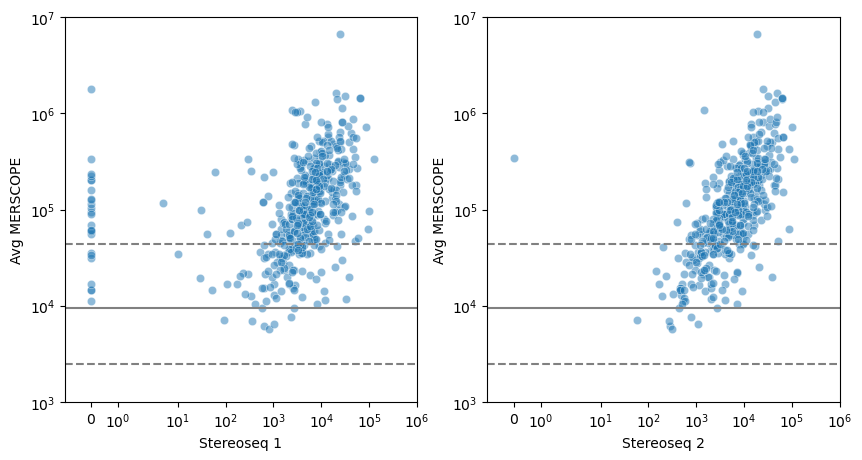

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(data=merscope_counts, x='Stereoseq 1', y='Avg MERSCOPE', alpha=0.5, lw=0, ax=ax[0])
sns.scatterplot(data=merscope_counts, x='Stereoseq 2', y='Avg MERSCOPE', alpha=0.5, lw=0, ax=ax[1])

min_blank = merscope_blanks['Avg'].min()
max_blank = merscope_blanks['Avg'].max()
avg_blank = merscope_blanks['Avg'].mean()
_ = [axs.axhline(min_blank, color='grey', ls='--') for axs in ax]
_ = [axs.axhline(max_blank, color='grey', ls='--') for axs in ax]
_ = [axs.axhline(avg_blank, color='grey') for axs in ax]

_ = [axs.set_xscale('symlog', base=10) for axs in ax]
_ = [axs.set_yscale('symlog', base=10) for axs in ax]

_ = [axs.set_xlim(-1, 1e6) for axs in ax]
_ = [axs.set_ylim(1e3, 1e7) for axs in ax]

In [61]:
dropouts = merscope_counts[(merscope_counts['Stereoseq 1'] == 0) | (merscope_counts['Stereoseq 2'] == 0)]
dropouts

MERSCOPE 1  MERSCOPE 2  Stereoseq 1  Stereoseq 2  Macaque 1 log  \
ADAMTSL3         65210       54833          0.0       1911.0       0.000000   
AKR1C1          116179       74536          0.0       2579.0       0.000000   
ANKFN1           12682        9794          0.0        533.0       0.000000   
ARMH3           114916       93505          0.0       4710.0       0.000000   
C4H6orf141       39353       31873          0.0        580.0       0.000000   
C8H8orf34        35289       27954          0.0       4877.0       0.000000   
CA4              59135       53396          0.0       6437.0       0.000000   
CHCHD3          173674      142411          0.0       4418.0       0.000000   
CHRM3           227099      180602          0.0      15632.0       0.000000   
CHRNA7           93827       84203          0.0       3500.0       0.000000   
DCHS2            58398       60392          0.0       2379.0       0.000000   
DLC1            144858       81930          0.0       8851.0       0.000000   
GUCY1A1         225548      177702          0.0       6108.0       0.000000   
INSYN2B          17497       11864          0.0        451.0       0.000000   
INSYN2B          17497       11864          0.0        451.0       0.000000   
KCNMB2           19537       14227          0.0       3999.0       0.000000   
LINGO2          134133      115678          0.0      26902.0       0.000000   
MPRIP          1766886     1821237          0.0      24844.0       0.000000   
OGA             326325      122601          0.0      33781.0       0.000000   
PRKN             73130       64606          0.0       6881.0       0.000000   
SRGAP2          240114      229456          0.0      11158.0       0.000000   
SRRM3           132476      125976          0.0       5503.0       0.000000   
TAFA1            65824       57411          0.0      15446.0       0.000000   
TAFA2            41227       26553          0.0      13999.0       0.000000   
VSTM2A          355664      313498          0.0      27330.0       0.000000   
ZBTB20          358033      334920       2658.0          0.0       7.885329   

            Macaque 2 log        FPKM  FPKM log  MERSCOPE 1 log  \
ADAMTSL3         7.555382    2.756769  1.014059       11.085368   
AKR1C1           7.855157   30.917433  3.431320       11.662887   
ANKFN1           6.278521    0.836540 -0.178481        9.447939   
ARMH3            8.457443    3.552735  1.267718       11.651957   
C4H6orf141       6.363028    0.687232 -0.375083       10.580327   
C8H8orf34        8.492286    3.021341  1.105701       10.471327   
CA4              8.769818   15.809464  2.760609       10.987578   
CHCHD3           8.393442   17.045977  2.835914       12.064935   
CHRM3            9.657075   30.383808  3.413910       12.333141   
CHRNA7           8.160518    8.341752  2.121273       11.449208   
DCHS2            7.774436    2.544625  0.933983       10.975037   
DLC1             9.088286   23.114460  3.140458       11.883509   
GUCY1A1          8.717355   28.716208  3.357462       12.326288   
INSYN2B          6.111467    0.844387 -0.169144        9.769785   
INSYN2B          6.111467    1.235035  0.211099        9.769785   
KCNMB2           8.293800    5.576915  1.718636        9.880065   
LINGO2          10.199956   12.622630  2.535491       11.806587   
MPRIP           10.120372   88.406822  4.481949       14.384729   
OGA             10.427654   79.238907  4.372467       12.695649   
PRKN             8.836519    3.306200  1.195799       11.199994   
SRGAP2           9.319912   32.648224  3.485790       12.388869   
SRRM3            8.613049    6.190426  1.823004       11.794157   
TAFA1            9.645105   27.054007  3.297835       11.094740   
TAFA2            9.546741  245.276108  5.502385       10.626849   
VSTM2A          10.215740   43.230869  3.766555       12.781742   
ZBTB20           0.000000   19.899775  2.990708       12.788380   

            MERSCOPE 2 log  Stereoseq 1 log  Stereoseq 2 log  Avg ME

In [138]:
def abline(slope, intercept, ax, args=None):
    """Plot a line from slope and intercept"""
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, **args)

In [75]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import QuantileTransformer
model = LinearRegression()
qt = QuantileTransformer(n_quantiles=50, output_distribution='normal')

In [142]:
stereoseq1_counts = merscope_counts[merscope_counts['Stereoseq 1']>0][['Stereoseq 1', 'Avg MERSCOPE']]
stereoseq1_counts['Ratio'] = stereoseq1_counts.apply(lambda x: x['Stereoseq 1'] / x['Avg MERSCOPE'], axis=1)
x = stereoseq1_counts['Stereoseq 1'].to_numpy().reshape((-1, 1))
y = stereoseq1_counts['Avg MERSCOPE'].to_numpy()
s1_fit = model.fit(np.log(x), np.log(y))
print(f'R^2: {s1_fit.score(np.log(x), np.log(y)): 0.3f}')


R^2:  0.286


In [143]:
stereoseq2_counts = merscope_counts[merscope_counts['Stereoseq 2'] > 0][['Stereoseq 2', 'Avg MERSCOPE']]
stereoseq2_counts['Ratio'] = stereoseq2_counts.apply(lambda x: x['Stereoseq 2'] / x['Avg MERSCOPE'], axis=1)
x = stereoseq2_counts['Stereoseq 2'].to_numpy().reshape((-1, 1))
y = stereoseq2_counts['Avg MERSCOPE'].to_numpy()
s2_fit = model.fit(np.log(x), np.log(y))
print(f'R^2: {s2_fit.score(np.log(x), np.log(y)): 0.3f}')


R^2:  0.519


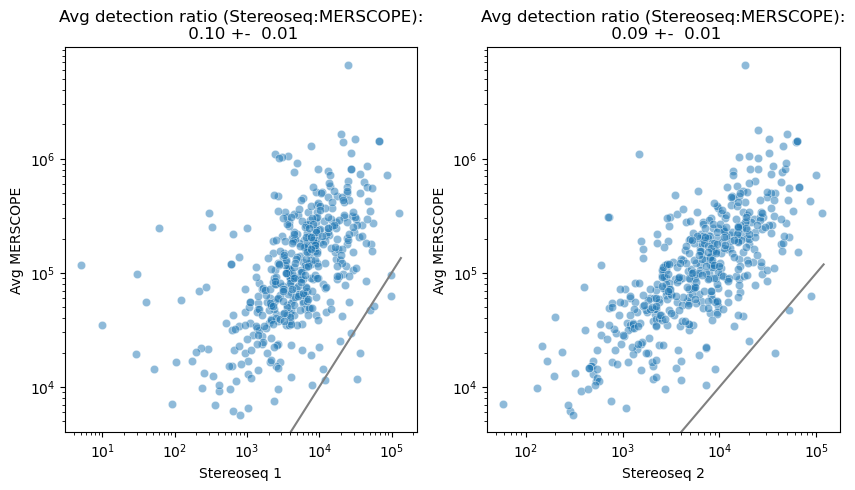

In [154]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(data=stereoseq1_counts, x='Stereoseq 1', y='Avg MERSCOPE', alpha=0.5, lw=0, ax=ax[0])
sns.scatterplot(data=stereoseq2_counts, x='Stereoseq 2', y='Avg MERSCOPE', alpha=0.5, lw=0, ax=ax[1])

abline(1, 0, ax[0], args={'color': 'grey'})
ax[0].set_title(f'Avg detection ratio (Stereoseq:MERSCOPE):\n{stereoseq1_counts["Ratio"].mean(): 0.2f} +- {stereoseq1_counts["Ratio"].sem(): 0.2f}')
abline(1, 0, ax[1], args={'color': 'grey'})
ax[1].set_title(f'Avg detection ratio (Stereoseq:MERSCOPE):\n{stereoseq2_counts["Ratio"].mean(): 0.2f} +- {stereoseq2_counts["Ratio"].sem(): 0.2f}')

_ = [axs.set_xscale('log') for axs in ax]
_ = [axs.set_yscale('log') for axs in ax]

Overall data quality of all datasets

In [3]:
genes_per_bin = pd.read_excel('C://Users/stephanies/data/BGI_data/bin_summary.xlsx', sheet_name='median gene count')
genes_per_bin.head()

Date aquired         Sample ID Other name      Specimen ID  Species  \
0   2022-05-19  SS200000379BR_C4      cDNA4           606844    mouse   
1   2022-06-01  SS200000579BR_D3      cDNA3           618133    mouse   
2   2022-06-01  SS200000579BR_D5      cDNA5  Q19.26.011.CX42  macaque   
3   2022-06-01  SS200000579BR_D2      cDNA2           618133    mouse   
4   2022-08-10  SS200000515TL_C4     cDNAC4  Q19.26.011.CX42  macaque   

                              Region  bin20  bin50  bin100  bin150  bin200  
0  right lateral hemisphere sagittal    217   1099    3094    5097    6836  
1    left medial hemisphere sagittal    199   1018    2927    4881    6637  
2                            MTG-STG    141    784    2439    4385    6067  
3    left medial hemisphere sagittal    213   1077    3064    5082    6850  
4                            MTG-STG    108    600    1908    3381    4871

In [38]:
gpb = genes_per_bin[['bin20', 'bin50', 'bin100', 'bin150', 'bin200']].melt()
gpb.rename(columns={'variable': 'binsize', 'value': 'n_genes'}, inplace=True)
gpb['species'] = gpb.apply(lambda x: genes_per_bin[genes_per_bin[x['binsize']]==x['n_genes']]['Species'].iloc[0], axis=1)
gpb.head()

binsize  n_genes  species
0   bin20      217    mouse
1   bin20      199    mouse
2   bin20      141  macaque
3   bin20      213    mouse
4   bin20      108  macaque

In [54]:
gpb.groupby('binsize').median().sort_values(['n_genes'])

n_genes
binsize         
bin20      117.0
bin50      649.5
bin100    2056.0
bin150    3704.5
bin200    5306.5

<AxesSubplot:xlabel='binsize', ylabel='n_genes'>

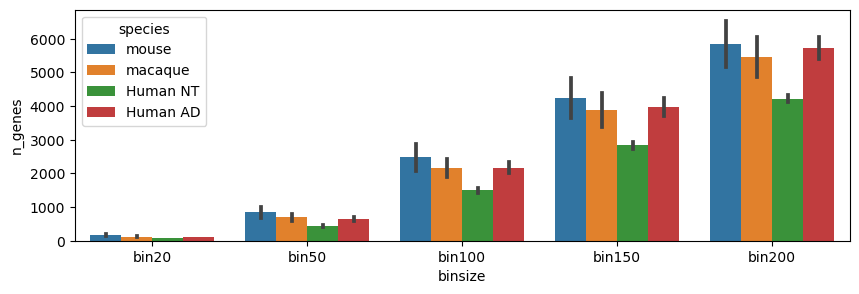

In [56]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.barplot(data=gpb, x='binsize', y='n_genes', hue='species', ax=ax)
# ax.set_yscale('symlog')

In [4]:
transcripts_per_bin = pd.read_excel('C://Users/stephanies/data/BGI_data/bin_summary.xlsx', sheet_name='median transcript count')
transcripts_per_bin.head()

Date aquired         Sample ID Other name      Specimen ID  Species  \
0   2022-05-19  SS200000379BR_C4      cDNA4           606844    mouse   
1   2022-06-01  SS200000579BR_D3      cDNA3           618133    mouse   
2   2022-06-01  SS200000579BR_D5      cDNA5  Q19.26.011.CX42  macaque   
3   2022-06-01  SS200000579BR_D2      cDNA2           618133    mouse   
4   2022-08-10  SS200000515TL_C4     cDNAC4  Q19.26.011.CX42  macaque   

                              Region  bin20  bin50  bin100  bin150  bin200  
0  right lateral hemisphere sagittal    335   2109    8352   18687   32789  
1    left medial hemisphere sagittal    294   1844    7301   16236   28773  
2                            MTG-STG    211   1325    5191   11757   19912  
3    left medial hemisphere sagittal    317   1986    7908    1771   31355  
4                            MTG-STG    175   1085    4225    9229   16281

In [44]:
tpb = transcripts_per_bin[['bin20', 'bin50', 'bin100', 'bin150', 'bin200']].melt()
tpb.rename(columns={'variable': 'binsize', 'value': 'n_transcripts'}, inplace=True)
tpb['species'] = tpb.apply(lambda x: transcripts_per_bin[transcripts_per_bin[x['binsize']]==x['n_transcripts']]['Species'].iloc[0], axis=1)
tpb.head()

binsize  n_transcripts  species
0   bin20            335    mouse
1   bin20            294    mouse
2   bin20            211  macaque
3   bin20            317    mouse
4   bin20            175  macaque

In [55]:
tpb.groupby('binsize').median().sort_values(['n_transcripts'])

n_transcripts
binsize               
bin20            190.5
bin50           1213.5
bin100          4858.5
bin150         10652.5
bin200         19464.5

<AxesSubplot:xlabel='binsize', ylabel='n_transcripts'>

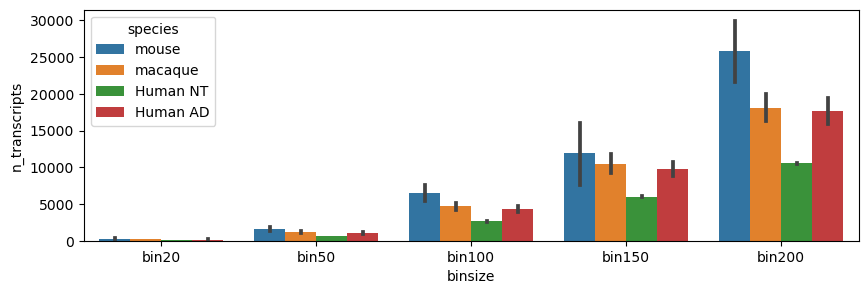

In [57]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.barplot(data=tpb, x='binsize', y='n_transcripts', hue='species', ax=ax)
# ax.set_yscale('symlog')